# RQ4: How frequently do developers use the conversion functions?


In [45]:
from pathlib import Path

import pandas as pd
# extracted compressed results
!unzip -o ../../data/sfconvertbot_pr_metadata.csv.zip -d ../../data
# Load the dataset
df = pd.read_csv(Path('../../data/sfconvertbot_pr_metadata.csv'))
# filter out rows with empty 'model_id' column in place
df = df[df['model_id'].notnull()]
# add a date column
df['date'] = df['time'].str.split('T').str[0]
df['date'] = df['date'].str.split(' ').str[0]
# ensure date column is a datetime object
df['date'] = pd.to_datetime(df['date'])
# filter in place, keep only commits before Oct 31 2024 (including)
df = df[df['date'] <= pd.Timestamp(2024, 10, 31)]
# remove the extracted zip file
!rm ../../data/sfconvertbot_pr_metadata.csv

df

Archive:  ../../data/sfconvertbot_pr_metadata.csv.zip
  inflating: ../../data/sfconvertbot_pr_metadata.csv  


,pr_url,discussion_metadata,header_metadata,model_id,time,date
235,https://huggingface.co/osunlp/attrscore-flan-t...,"{""apiBaseUrl"":""/api/models/osunlp/attrscore-fl...","{""discussion"":{""_id"":""6724172b01dfe1d1b6cd8079...",osunlp/attrscore-flan-t5-xl,2024-10-31T23:47:55.000Z,2024-10-31
236,https://huggingface.co/Dheeraj46329/llama-3.2-...,"{""apiBaseUrl"":""/api/models/Dheeraj46329/llama-...","{""discussion"":{""_id"":""6724157c708f76fcb90337b6...",Dheeraj46329/llama-3.2-new-22-0.5-3e,2024-10-31T23:40:44.000Z,2024-10-31
237,https://huggingface.co/Dheeraj46329/llama-3.2-...,"{""apiBaseUrl"":""/api/models/Dheeraj46329/llama-...","{""discussion"":{""_id"":""67241365d31bd8b04d8532e8...",Dheeraj46329/llama-3.2-new-26-0.5-3e,2024-10-31T23:31:49.000Z,2024-10-31
238,https://huggingface.co/BAAI/Emu2/discussions/4...,"{""apiBaseUrl"":""/api/models/BAAI/Emu2"",""current...","{""discussion"":{""_id"":""6724120a93b72c9eaf2fadc6...",BAAI/Emu2,2024-10-31T23:26:02.000Z,2024-10-31
239,https://huggingface.co/royweiss1/T5_MiddleSent...,"{""apiBaseUrl"":""/api/models/royweiss1/T5_Middle...","{""discussion"":{""_id"":""6724101f1fc6d46db5cce1b6...",royweiss1/T5_MiddleSentences,2024-10-31T23:17:51.000Z,2024-10-31
...,...,...,...,...,...,...
45389,https://huggingface.co/cahya/bert-base-indones...,"{""apiBaseUrl"":""/api/models/cahya/bert-base-ind...","{""discussion"":{""_id"":""641337164c23691ebe156b98...",cahya/bert-base-indonesian-NER,2023-03-16 16:34:48.663142,2023-03-16
45390,https://huggingface.co/NonzeroCornet34/DialoGP...,"{""apiBaseUrl"":""/api/models/NonzeroCornet34/Dia...","{""discussion"":{""_id"":""641337145e06fbbe23a0f1c7...",NonzeroCornet34/DialoGPT-small-philbot,2023-03-16 16:34:46.516709,2023-03-16
45391,https://huggingface.co/uer/chinese_roberta_L-1...,"{""apiBaseUrl"":""/api/models/uer/chinese_roberta...","{""discussion"":{""_id"":""6413371374a580779ac98717...",uer/chinese_roberta_L-12_H-768,2023-03-16 16:34:46.082500,2023-03-16
45392,https://huggingface.co/Narsil/finbert2/discuss...,"{""apiBaseUrl"":""/api/models/Narsil/finbert2"",""c...","{""discussion"":{""_id"":""641337045e06fbbe23a0ed64...",Narsil/finbert2,2023-03-16 16:34:30.349179,2023-03-16


In [3]:
from tqdm import tqdm
import json

# Extract status changes from discussion metadata
for index, row in tqdm(df.iterrows(), total=len(df)):
    status_changes = []
    df.at[index, 'conflicts'] = ""
    try:
        discussion_metadata = json.loads(row['discussion_metadata'])
        for event in discussion_metadata['discussion']['events']:
            event_type = event['type']
            if event_type == 'status-change':
                status_changes.append(event['data']['status'])
    except:
        pass
    try:
        header_metadata = json.loads(row['header_metadata'])
        df.at[index, 'status'] = header_metadata['discussion']['status']
        # check if there are conflicting files
        conflicting_files = header_metadata['discussion']['filesWithConflicts']
        df.at[index, 'conflicts'] = ";".join(conflicting_files)
    except:
        pass
    
    # add a column to track status changes
    df.at[index, 'status_changes'] = ";".join(status_changes)
df


100%|██████████| 8333/8333 [00:01<00:00, 4812.23it/s]


,model_id,pr_url,time,discussion_metadata,header_metadata,conflicts,status,status_changes
0,julien-c/hotdog-not-hotdog,https://huggingface.co/julien-c/hotdog-not-hot...,2022-11-07 14:00:58.522127,"{""apiBaseUrl"":""/api/models/julien-c/hotdog-not...","{""discussion"":{""_id"":""63690187da9b693c272fa24b...",,closed,closed
1,julien-c/hotdog-not-hotdog,https://huggingface.co/julien-c/hotdog-not-hot...,2022-11-07 13:08:07.639102,"{""apiBaseUrl"":""/api/models/julien-c/hotdog-not...","{""discussion"":{""_id"":""6369033585fef3ca96e226c1...",,open,
2,Bingsu/clip-vit-base-patch32-ko,https://huggingface.co/Bingsu/clip-vit-base-pa...,2022-11-08 11:01:01.873169,"{""apiBaseUrl"":""/api/models/Bingsu/clip-vit-bas...","{""discussion"":{""_id"":""636a36ebfbc31ee68fee9d2d...",,merged,merged
3,bert-base-uncased,https://huggingface.co/bert-base-uncased/discu...,2022-11-10 09:35:58.379451,"{""apiBaseUrl"":""/api/models/google-bert/bert-ba...","{""discussion"":{""_id"":""636cc5fcdd7265f81aa0e280...",,merged,merged
4,Norod78/hebrew-gpt_neo-small,https://huggingface.co/Norod78/hebrew-gpt_neo-...,2022-11-10 10:34:42.960641,"{""apiBaseUrl"":""/api/models/Norod78/hebrew-gpt_...","{""discussion"":{""_id"":""636cd3c0d963c5679361edd2...",,merged,merged
...,...,...,...,...,...,...,...,...
8328,marianna13/bert-multilingual-sentiment,https://huggingface.co/marianna13/bert-multili...,2023-04-05 17:20:08.184733,"{""apiBaseUrl"":""/api/models/marianna13/bert-mul...","{""discussion"":{""_id"":""642d91a632bdf5af73e9e307...",,open,
8329,tanoManzo/minilm-attitude-few10p,https://huggingface.co/tanoManzo/minilm-attitu...,2023-04-05 17:22:17.331096,"{""apiBaseUrl"":""/api/models/tanoManzo/minilm-at...","{""discussion"":{""_id"":""642d922425c08a2cb4ba72b3...",,open,
8330,reshinthadith/instruct-codegen-350M-multi,https://huggingface.co/reshinthadith/instruct-...,2023-04-05 17:25:11.641138,"{""apiBaseUrl"":""/api/models/reshinthadith/instr...","{""discussion"":{""_id"":""642d92cb42b094c91388a8bd...",,open,
8331,ArisuNguyen/bart_finetuned_5e_5,https://huggingface.co/ArisuNguyen/bart_finetu...,2023-04-05 17:27:40.223615,"{""apiBaseUrl"":""/api/models/ArisuNguyen/bart_fi...","{""discussion"":{""_id"":""642d936a25c08a2cb4ba8dbc...",,open,


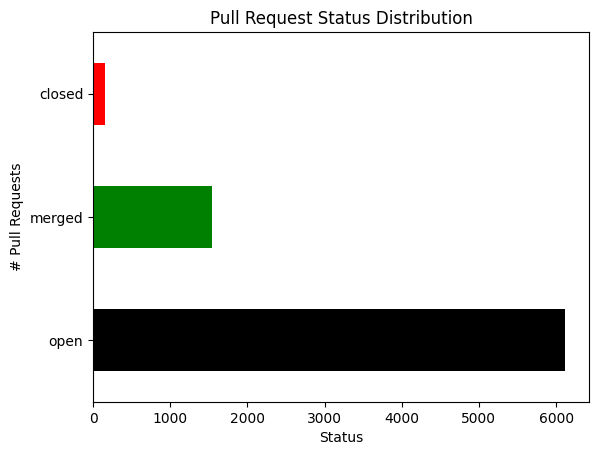

<Axes: ylabel='count'>

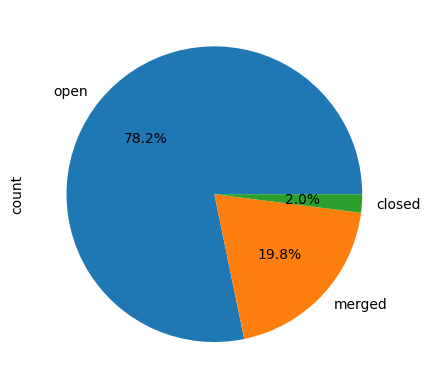

In [8]:

import matplotlib.pyplot as plt


status_distribution = df['status'].value_counts()
# Plot the status distribution horizontally
status_distribution.plot(kind='barh', color=['black', 'green', 'red'])

# Add title and labels
plt.title('Pull Request Status Distribution')
plt.xlabel('Status')
plt.ylabel('# Pull Requests')
plt.show()

# show pie chart
status_distribution.plot.pie(autopct='%1.1f%%')

## Merge Conflict Analysis

Number of PRs:  8333
Number of PRs with conflicts:  111
Percentage of PRs with conflicts:  1.3320532821312852
Number of PRs without conflicts:  8222
Percentage of PRs without conflicts:  98.66794671786872


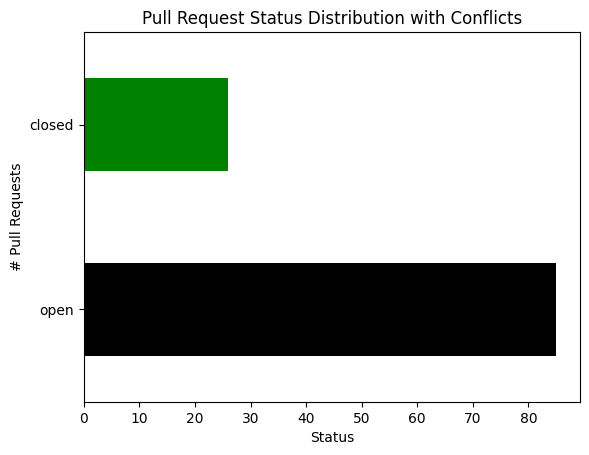

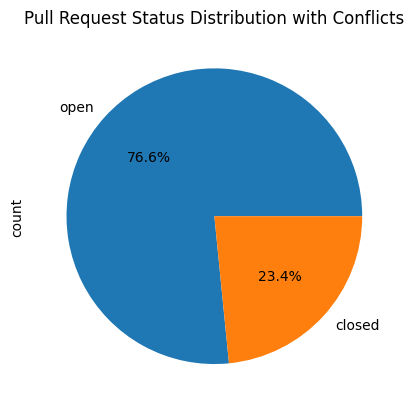

In [21]:
# how many rows with non-empty values in 'conflicts' column
conflicts = df[df['conflicts'] != ""]


print("Number of PRs: ", len(df))
print("Number of PRs with conflicts: ", len(conflicts))
print("Percentage of PRs with conflicts: ", len(conflicts) / len(df) * 100)
print("Number of PRs without conflicts: ", len(df) - len(conflicts))
print("Percentage of PRs without conflicts: ", (len(df) - len(conflicts)) / len(df) * 100)


# plot status distribution for conflicts
conflicts_status_distribution = conflicts['status'].value_counts()
conflicts_status_distribution.plot(kind='barh', color=['black', 'green', 'red'])
# add title and labels
plt.title('Pull Request Status Distribution with Conflicts')
plt.xlabel('Status')
plt.ylabel('# Pull Requests')
plt.show()
# show pie chart
conflicts_status_distribution.plot.pie(autopct='%1.1f%%')
# add title and labels
plt.title('Pull Request Status Distribution with Conflicts')
plt.show()
